In [261]:
import pandas as pd
import sys
# !{sys.executable} -m pip install jinja2
# import matplotlib.pyplot as plt
import datetime
from datetime import date
import calendar
import numpy as np
import csv

# Set two constants for today's date and yesterday's date, can be changed when testing code in between state updates 
# (i.e. before noon on a given day)
TODAY = date.today()
YESTERDAY = date.today() - datetime.timedelta(days=1)

In [262]:
months = dict([('Jan','01'), ('Feb','02'),('Mar','03'),('Apr','04'),('May','05'),('Jun','06'),('Jul','07'),('Aug','08'),('Sep','09'),('Oct','10'),('Nov','11'),('Dec','12')])
# define dates dictionary with the keys being the 3 letter abbreviations used in the commit dates on github, and 
# the values being the appropriate 2 digit numbers for each date

def convert_date(commit):
    # function to clean date strings as they appear in the CSV when it is originally scraped from GitHub, in the form 
    # "Commits on...", returns a datetime object for each date
    vals = commit.split(' ')[2:]
    month = months[vals[0]]
    day = vals[1].replace(',','')
    if len(day) == 1:
        day = '0' + day
    year = vals[2]
    result = year + '-' + month + '-' + day
    return date.fromisoformat(result)

In [263]:
# create data frame from cumulative probable-confirmed-by-race.csv, and appends the csv holding the data from prior to the 
# GitHub organizational changes
nycFatals = pd.read_csv('confirmedProbableDeathDataUpdate.csv').append(pd.read_csv('confirmedProbableDeathData.csv'),ignore_index=True)

# clean data; rename columns, fix date values, sort data frame in ascending order by date
nycFatals.rename(columns = {'RACE_GROUP':'Race'}, inplace = True)
nycFatals.rename(columns = {'CONFIRMED_DEATH':'Confirmed Deaths'}, inplace = True)
nycFatals.rename(columns = {'PROBABLE_DEATH':'Probable Deaths'}, inplace = True)

# apply the convert_date function defined above to the Date column
nycFatals['Date'] = nycFatals['Date'].apply(convert_date)

# sort the DataFrame into ascending order by date, then race group (alphabetically)
nycFatals = nycFatals.sort_values(by=['Date','Race'])

In [264]:
# perform same cleaning to the master dataset
nycMaster = pd.read_csv('masterDataUpdate.csv').append(pd.read_csv('masterData.csv'),ignore_index=True)

nycMaster.rename(columns={'RACE_GROUP':'Race'}, inplace=True)
nycMaster.rename(columns={'CASE_RATE_ADJ':'Case Rate'}, inplace=True)
nycMaster.rename(columns={'HOSPITALIZED_RATE_ADJ':'Hospitalized Rate'}, inplace=True)
nycMaster.rename(columns={'DEATH_RATE_ADJ':'Death Rate'}, inplace=True)
nycMaster.rename(columns={'CASE_COUNT':'Cases'}, inplace=True)
nycMaster.rename(columns={'HOSPITALIZED_COUNT':'Hosp.'}, inplace=True)
nycMaster.rename(columns={'DEATH_COUNT':'Deaths'}, inplace=True)

nycMaster['Date'] = nycMaster['Date'].apply(convert_date)
nycMaster = nycMaster.sort_values(by=['Date','Race'])

In [265]:
# create a cases DataFrame for just the relevant data concerning cases
cases = pd.DataFrame()
cases['Date'] = nycMaster[nycMaster['Race'] == 'White']['Date'].values
cases['Cases API'] = nycMaster[nycMaster['Race'] == 'Asian/Pacific-Islander']['Cases'].values
cases['Cases Black'] = nycMaster[nycMaster['Race'] == 'Black/African-American']['Cases'].values
cases['Cases Latinx'] = nycMaster[nycMaster['Race'] == 'Hispanic/Latino']['Cases'].values
cases['Cases White'] = nycMaster[nycMaster['Race'] == 'White']['Cases'].values

In [266]:
# create a deaths DataFrame for just the relevant data concerning deaths.
deaths = pd.DataFrame()
deaths['Date'] = nycMaster[nycMaster['Race'] == 'White']['Date'].values
deaths['Deaths API'] = nycMaster[nycMaster['Race'] == 'Asian/Pacific-Islander']['Deaths'].values
deaths['Probable API'] = nycFatals[nycFatals['Race'] == 'Asian/Pacific-Islander']['Probable Deaths'].values
deaths['Deaths Black'] = nycMaster[nycMaster['Race'] == 'Black/African-American']['Deaths'].values
deaths['Probable Black'] = nycFatals[nycFatals['Race'] == 'Black/African-American']['Probable Deaths'].values
deaths['Deaths Latinx'] = nycMaster[nycMaster['Race'] == 'Hispanic/Latino']['Deaths'].values
deaths['Probable Latinx'] = nycFatals[nycFatals['Race'] == 'Hispanic/Latino']['Probable Deaths'].values
deaths['Deaths White'] = nycMaster[nycMaster['Race'] == 'White']['Deaths'].values
deaths['Probable White'] = nycFatals[nycFatals['Race'] == 'White']['Probable Deaths'].values
deaths['Deaths Data Pending'] = nycFatals[nycFatals['Race'] == 'Data pending']['Confirmed Deaths'].values
deaths['Probable Data Pending'] = nycFatals[nycFatals['Race'] == 'Data pending']['Probable Deaths'].values
deaths['Deaths Unknown'] = nycFatals[nycFatals['Race'] == 'Other/Unknown']['Confirmed Deaths'].values
deaths['Probable Unknown'] = nycFatals[nycFatals['Race'] == 'Other/Unknown']['Probable Deaths'].values

In [267]:
# create a hospitalizations DataFrame for just the relevant data concerning cases
hospitalizations = pd.DataFrame()
hospitalizations['Date'] = nycMaster[nycMaster['Race'] == 'White']['Date'].values
hospitalizations['Hosps API'] = nycMaster[nycMaster['Race'] == 'Asian/Pacific-Islander']['Hosp.'].values
hospitalizations['Hosps Black'] = nycMaster[nycMaster['Race'] == 'Black/African-American']['Hosp.'].values
hospitalizations['Hosps Latinx'] = nycMaster[nycMaster['Race'] == 'Hispanic/Latino']['Hosp.'].values
hospitalizations['Hosps White'] = nycMaster[nycMaster['Race'] == 'White']['Hosp.'].values

In [268]:
# Data quality check #1 --> difference in each category (the amount each category increased or decreased)
difference = pd.DataFrame()
difference['Date'] = deaths['Date'].values

difference['Deaths API'] = deaths['Deaths API'].diff()
difference['Probable Deaths API'] = deaths['Probable API'].diff()
difference['Deaths Black'] = deaths['Deaths Black'].diff()
difference['Probable Deaths Black'] = deaths['Probable Black'].diff()
difference['Deaths Latinx'] = deaths['Deaths Latinx'].diff()
difference['Probable Deaths Latinx'] = deaths['Probable Latinx'].diff()
difference['Deaths White'] = deaths['Deaths White'].diff()
difference['Probable Deaths White'] = deaths['Probable White'].diff()
difference['Deaths Data Pending'] = deaths['Deaths Data Pending'].diff()
difference['Probable Data Pending'] = deaths['Probable Data Pending'].diff()
difference['Deaths Unknown'] = deaths['Deaths Unknown'].diff()
difference['Probable Unknown'] = deaths['Probable Unknown'].diff()
difference['Cases API'] = cases['Cases API'].diff()
difference['Cases Black'] = cases['Cases Black'].diff()
difference['Cases Latinx'] = cases['Cases Latinx'].diff()
difference['Cases White'] = cases['Cases White'].diff()
difference['Hosp API'] = hospitalizations['Hosps API'].diff()
difference['Hosp Black'] = hospitalizations['Hosps Black'].diff()
difference['Hosp Latinx'] = hospitalizations['Hosps Latinx'].diff()
difference['Hosp White'] = hospitalizations['Hosps White'].diff()

# results DataFrame for difference checks
diffCheck = pd.DataFrame(columns = ['Race', 'Δ Cases','Δ Hosps','Δ Deaths', 'Δ Probables'])
checkToday = difference[difference['Date'] == TODAY]

diffCheck = diffCheck.append({'Race':'Asian/Pacific-Islander', 'Δ Cases':checkToday['Cases API'].sum(),'Δ Hosps':checkToday['Hosp API'].sum(),'Δ Deaths': checkToday['Deaths API'].sum(), 'Δ Probables':checkToday['Probable Deaths API'].sum()},ignore_index=True)

diffCheck = diffCheck.append({'Race':'Black/African-American', 'Δ Cases':checkToday['Cases Black'].sum(),'Δ Hosps':checkToday['Hosp Black'].sum(),'Δ Deaths': checkToday['Deaths Black'].sum(),'Δ Probables':checkToday['Probable Deaths Black'].sum()},ignore_index=True)

diffCheck = diffCheck.append({'Race':'Hispanic/Latinx', 'Δ Cases':checkToday['Cases Latinx'].sum(),'Δ Hosps':checkToday['Hosp Latinx'].sum(),'Δ Deaths': checkToday['Deaths Latinx'].sum(),'Δ Probables':checkToday['Probable Deaths Latinx'].sum()},ignore_index=True)

diffCheck = diffCheck.append({'Race':'White', 'Δ Cases':checkToday['Cases White'].sum(),'Δ Hosps':checkToday['Hosp White'].sum(),'Δ Deaths': checkToday['Deaths White'].sum(),'Δ Probables':checkToday['Probable Deaths White'].sum()},ignore_index=True)

diffCheck = diffCheck.append({'Race':'Data Pending', 'Δ Cases':0,'Δ Hosps':0,'Δ Deaths': checkToday['Deaths Data Pending'].sum(),'Δ Probables':checkToday['Probable Data Pending'].sum()},ignore_index=True)

diffCheck = diffCheck.append({'Race':'Other/Unknown', 'Δ Cases':0,'Δ Hosps':0,'Δ Deaths': checkToday['Deaths Unknown'].sum(),'Δ Probables':checkToday['Probable Unknown'].sum()},ignore_index=True)

diffCheck.style.applymap(lambda x: 'background-color : orange' if  x < 0 else 'background-color : red' if x < -100 else '', subset = ['Δ Cases','Δ Hosps','Δ Deaths','Δ Probables'])

,Race,Δ Cases,Δ Hosps,Δ Deaths,Δ Probables
0,Asian/Pacific-Islander,249.000000,20.000000,0.000000,0.000000
1,Black/African-American,323.000000,42.000000,1.000000,0.000000
2,Hispanic/Latinx,913.000000,51.000000,2.000000,2.000000
3,White,741.000000,74.000000,5.000000,2.000000
4,Data Pending,0.000000,0.000000,0.000000,1.000000
5,Other/Unknown,0.000000,0.000000,-1.000000,0.000000


In [269]:
# Timeseries - %OfSelf checks
ofSelf = pd.DataFrame()
ofSelf['Date'] = deaths['Date'].values

ofSelf['Deaths API'] = (deaths['Deaths API'].pct_change()) *100
ofSelf['Probable API'] = (deaths['Probable API'].pct_change()) *100
ofSelf['Deaths Black'] = (deaths['Deaths Black'].pct_change()) *100
ofSelf['Probable Black'] = (deaths['Probable Black'].pct_change()) *100
ofSelf['Deaths Latinx'] = (deaths['Deaths Latinx'].pct_change()) *100
ofSelf['Probable Latinx'] = (deaths['Probable Latinx'].pct_change()) *100
ofSelf['Deaths White'] = (deaths['Deaths White'].pct_change()) *100
ofSelf['Probable White'] = (deaths['Probable White'].pct_change()) *100
ofSelf['Deaths Data Pending'] = (deaths['Deaths Data Pending'].pct_change()) *100
ofSelf['Probable Data Pending'] = (deaths['Probable Data Pending'].pct_change()) *100
ofSelf['Deaths Unknown'] = (deaths['Deaths Unknown'].pct_change()) *100
ofSelf['Probable Unknown'] = (deaths['Probable Unknown'].pct_change()) *100
ofSelf['Cases API'] = (cases['Cases API'].pct_change()) *100
ofSelf['Cases Black'] = (cases['Cases Black'].pct_change()) *100
ofSelf['Cases Latinx'] = (cases['Cases Latinx'].pct_change()) *100
ofSelf['Cases White'] = (cases['Cases White'].pct_change()) *100
ofSelf['Hosps API'] = (hospitalizations['Hosps API'].pct_change()) *100
ofSelf['Hosps Black'] = (hospitalizations['Hosps Black'].pct_change()) *100
ofSelf['Hosps Latinx'] = (hospitalizations['Hosps Latinx'].pct_change()) *100
ofSelf['Hosps White'] = (hospitalizations['Hosps White'].pct_change()) *100

selfCheck = pd.DataFrame(columns=['Race','%OfSelf cases','%OfSelf Hosps','%OfSelf Deaths','%OfSelf Probable'])
selfToday = ofSelf[ofSelf['Date'] == TODAY]

selfCheck = selfCheck.append({'Race':'Asian/Pacific-Islander','%OfSelf cases':selfToday['Cases API'].sum(),'%OfSelf Hosps':selfToday['Hosps API'].sum(),'%OfSelf Deaths':selfToday['Deaths API'].sum(),'%OfSelf Probable':selfToday['Probable API'].sum()},ignore_index=True)

selfCheck = selfCheck.append({'Race':'Black/African-American','%OfSelf cases':selfToday['Cases Black'].sum(),'%OfSelf Hosps':selfToday['Hosps Black'].sum(),'%OfSelf Deaths':selfToday['Deaths Black'].sum(),'%OfSelf Probable':selfToday['Probable Black'].sum()},ignore_index=True)

selfCheck = selfCheck.append({'Race':'Hispanic/Latinx','%OfSelf cases':selfToday['Cases Latinx'].sum(),'%OfSelf Hosps':selfToday['Hosps Latinx'].sum(),'%OfSelf Deaths':selfToday['Deaths Latinx'].sum(),'%OfSelf Probable':selfToday['Probable Latinx'].sum()},ignore_index=True)

selfCheck = selfCheck.append({'Race':'White','%OfSelf cases':selfToday['Cases White'].sum(),'%OfSelf Hosps':selfToday['Hosps White'].sum(),'%OfSelf Deaths':selfToday['Deaths White'].sum(),'%OfSelf Probable':selfToday['Probable White'].sum()},ignore_index=True)

selfCheck = selfCheck.append({'Race':'Data Pending','%OfSelf cases':0,'%OfSelf Hosps':0,'%OfSelf Deaths':selfToday['Deaths Data Pending'].sum(),'%OfSelf Probable':selfToday['Probable Data Pending'].sum()},ignore_index=True)

selfCheck = selfCheck.append({'Race':'Other/Unknown','%OfSelf cases':0,'%OfSelf Hosps':0,'%OfSelf Deaths':selfToday['Deaths Unknown'].sum(),'%OfSelf Probable':selfToday['Probable Unknown'].sum()},ignore_index=True)

selfCheck.style.applymap(lambda x: 'background-color : orange' if  x < 0 else 'background-color : red' if x < -100 else '', subset = ['%OfSelf cases','%OfSelf Hosps','%OfSelf Deaths','%OfSelf Probable'])

,Race,%OfSelf cases,%OfSelf Hosps,%OfSelf Deaths,%OfSelf Probable
0,Asian/Pacific-Islander,1.843489,0.489956,0.000000,0.000000
1,Black/African-American,0.784742,0.262549,0.018560,0.000000
2,Hispanic/Latinx,1.587854,0.286340,0.033223,0.158103
3,White,1.581947,0.580256,0.100241,0.166251
4,Data Pending,0.000000,0.000000,0.000000,8.333333
5,Other/Unknown,0.000000,0.000000,-0.059488,0.000000


In [270]:
# Timeseries: %OfTotal check
ofTotal = pd.DataFrame()

ofTotal['Date'] = deaths['Date'].values

ofTotal['Cases API'] = (cases['Cases API'].div(cases.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Cases Black'] = (cases['Cases Black'].div(cases.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Cases Latinx'] = (cases['Cases Latinx'].div(cases.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Cases White'] = (cases['Cases White'].div(cases.sum(axis=1),axis=0).pct_change() * 100).values

ofTotal['Hosps API'] = (hospitalizations['Hosps API'].div(hospitalizations.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Hosps Black'] = (hospitalizations['Hosps Black'].div(hospitalizations.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Hosps Latinx'] = (hospitalizations['Hosps Latinx'].div(hospitalizations.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Hosps White'] = (hospitalizations['Hosps White'].div(hospitalizations.sum(axis=1),axis=0).pct_change() * 100).values

ofTotal['Deaths API'] = (deaths['Deaths API'].div(deaths.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Probable API'] = (deaths['Probable API'].div(deaths.sum(axis=1)).pct_change() * 100).values

ofTotal['Deaths Black'] = (deaths['Deaths Black'].div(deaths.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Probable Black'] = (deaths['Probable Black'].div(deaths.sum(axis=1)).pct_change() * 100).values

ofTotal['Deaths Latinx'] = (deaths['Deaths Latinx'].div(deaths.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Probable Latinx'] = (deaths['Probable Latinx'].div(deaths.sum(axis=1)).pct_change() * 100).values

ofTotal['Deaths White'] = (deaths['Deaths White'].div(deaths.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Probable White'] = (deaths['Probable White'].div(deaths.sum(axis=1)).pct_change() * 100).values

ofTotal['Deaths Data Pending'] = (deaths['Deaths Data Pending'].div(deaths.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Probable Data Pending'] = (deaths['Probable Data Pending'].div(deaths.sum(axis=1)).pct_change() * 100).values

ofTotal['Deaths Unknown'] = (deaths['Deaths Unknown'].div(deaths.sum(axis=1),axis=0).pct_change() * 100).values
ofTotal['Probable Unknown'] = (deaths['Probable Unknown'].div(deaths.sum(axis=1)).pct_change() * 100).values

# results dataframe for %OfTotal
totalCheck = pd.DataFrame(columns = ['Race','%OfTotal cases','%OfTotal hosps','%OfTotal deaths','%OfTotal probable deaths'])
totalToday = ofTotal[ofTotal['Date'] == TODAY]

totalCheck = totalCheck.append({'Race':'Asian/Pacific-Islander','%OfTotal cases':totalToday['Cases API'].sum(),'%OfTotal hosps':totalToday['Hosps API'].sum(),'%OfTotal deaths':totalToday['Deaths API'].sum(),'%OfTotal probable deaths':totalToday['Probable API'].sum()},ignore_index=True)

totalCheck = totalCheck.append({'Race':'Black/African-American','%OfTotal cases':totalToday['Cases Black'].sum(),'%OfTotal hosps':totalToday['Hosps Black'].sum(),'%OfTotal deaths':totalToday['Deaths Black'].sum(),'%OfTotal probable deaths':totalToday['Probable Black'].sum()},ignore_index=True)

totalCheck = totalCheck.append({'Race':'Hispanic/Latinx','%OfTotal cases':totalToday['Cases Latinx'].sum(),'%OfTotal hosps':totalToday['Hosps Latinx'].sum(),'%OfTotal deaths':totalToday['Deaths Latinx'].sum(),'%OfTotal probable deaths':totalToday['Probable Latinx'].sum()},ignore_index=True)

totalCheck = totalCheck.append({'Race':'White','%OfTotal cases':totalToday['Cases White'].sum(),'%OfTotal hosps':totalToday['Hosps White'].sum(),'%OfTotal deaths':totalToday['Deaths White'].sum(),'%OfTotal probable deaths':totalToday['Probable White'].sum()},ignore_index=True)

totalCheck = totalCheck.append({'Race':'Data Pending','%OfTotal cases':0,'%OfTotal hosps':0,'%OfTotal deaths':totalToday['Deaths Data Pending'].sum(),'%OfTotal probable deaths':totalToday['Probable Data Pending'].sum()},ignore_index=True)

totalCheck = totalCheck.append({'Race':'Other/Unknown','%OfTotal cases':0,'%OfTotal hosps':0,'%OfTotal deaths':totalToday['Deaths Unknown'].sum(),'%OfTotal probable deaths':totalToday['Probable Unknown'].sum()},ignore_index=True)

totalCheck.style.applymap(lambda x: 'background-color : yellow' if 10 < x <=25 else 'background-color : orange' if 25< x <= 50 else 'background-color:red' if 50<x else '', subset = ['%OfTotal cases','%OfTotal hosps','%OfTotal deaths','%OfTotal probable deaths'])

,Race,%OfTotal cases,%OfTotal hosps,%OfTotal deaths,%OfTotal probable deaths
0,Asian/Pacific-Islander,0.437426,0.120260,-0.049550,-0.049550
1,Black/African-American,-0.606702,-0.106310,-0.030999,-0.049550
2,Hispanic/Latinx,0.185321,-0.082606,-0.016344,0.108475
3,White,0.179496,0.210228,0.050641,0.116619
4,Data Pending,0.000000,0.000000,0.000000,8.279654
5,Other/Unknown,0.000000,0.000000,-0.109009,-0.049550


In [271]:
percentReported = pd.DataFrame(columns=['Date','Percent of Deaths with Race Data'])
percentReported['Date'] = deaths['Date'].values
percentReported['Percent of Deaths with Race Data'] = 100 - (deaths['Deaths Data Pending'] + deaths['Probable Data Pending'] + deaths['Deaths Unknown'] + deaths['Probable Unknown']).div(deaths.sum(axis=1))*100

percentReported['Mean'] = percentReported['Percent of Deaths with Race Data'].mean()

percentReported[percentReported['Date'] == TODAY]

,Date,Percent of Deaths with Race Data,Mean
188,2020-11-23,91.626063,91.529731


In [276]:
# set constants for the populations of NYC and New York State based on the census estimations used by NYC in calculating their 
# adjusted case/death/hospitalization rates
nycPop = 8336817

nysPop = 19453561

ofNYC = pd.DataFrame(columns=['Date','Cases %Of NYC', 'Deaths %Of NYC', 'Hosps %Of NYC'])
ofNYC['Date'] = deaths['Date']
ofNYC['Cases %Of NYC'] = (cases.sum(axis=1) / nycPop) *100
ofNYC['Cases %Of NYS'] = (cases.sum(axis=1) / nysPop) *100
ofNYC['Deaths %Of NYC'] = (deaths.sum(axis=1) / nycPop) * 100
ofNYC['Deaths %Of NYS'] = (deaths.sum(axis=1) / nycPop) * 100
ofNYC['Hosps %Of NYC'] = (hospitalizations.sum(axis=1)/nycPop) * 100
ofNYC['Hosps %Of NYS'] = (hospitalizations.sum(axis=1)/nysPop) * 100
ofNYC[ofNYC['Date'] ==TODAY]

,Date,Cases %Of NYC,Deaths %Of NYC,Hosps %Of NYC,Cases %Of NYS,Deaths %Of NYS,Hosps %Of NYS
188,2020-11-23,1.933988,0.290495,0.609705,0.82881,0.290495,0.261289


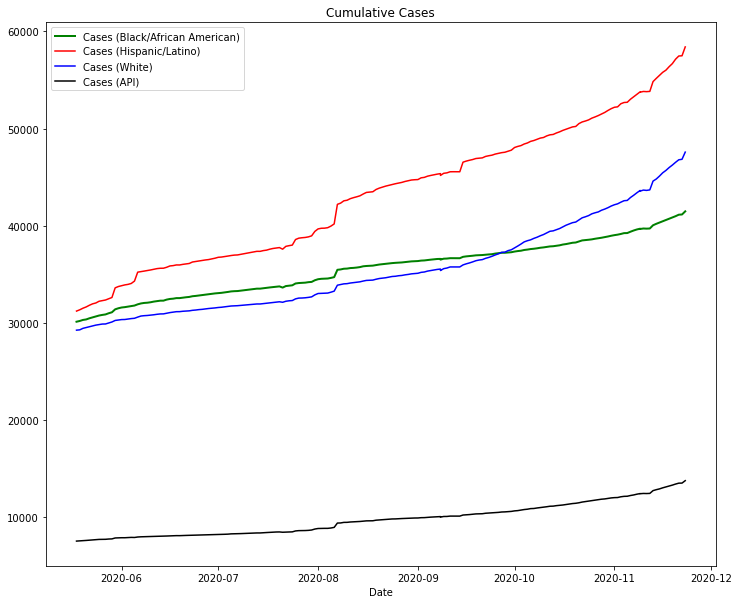

In [273]:
casesBAA = cases[['Date','Cases Black']]
casesBAA.rename(columns={'Cases Black':'Cases (Black/African American)'},inplace=True)
casesBAA.set_index('Date',inplace=True)

casesHL = cases[['Date','Cases Latinx']]
casesHL.rename(columns={'Cases Latinx':'Cases (Hispanic/Latino)'},inplace=True)
casesHL.set_index('Date',inplace=True)

casesWhite = cases[['Date','Cases White']]
casesWhite.rename(columns={'Cases White':'Cases (White)'},inplace=True)
casesWhite.set_index('Date',inplace=True)

casesAPI = cases[['Date','Cases API']]
casesAPI.rename(columns={'Cases API':'Cases (API)'},inplace=True)
casesAPI.set_index('Date',inplace=True)

ax=casesBAA.plot(figsize=(12, 10), title='Cumulative Cases',linewidth=2, color='green')

casesHL.plot(ax=ax, color='red')

casesWhite.plot(ax=ax, color='blue')

casesAPI.plot(ax=ax, color='black')

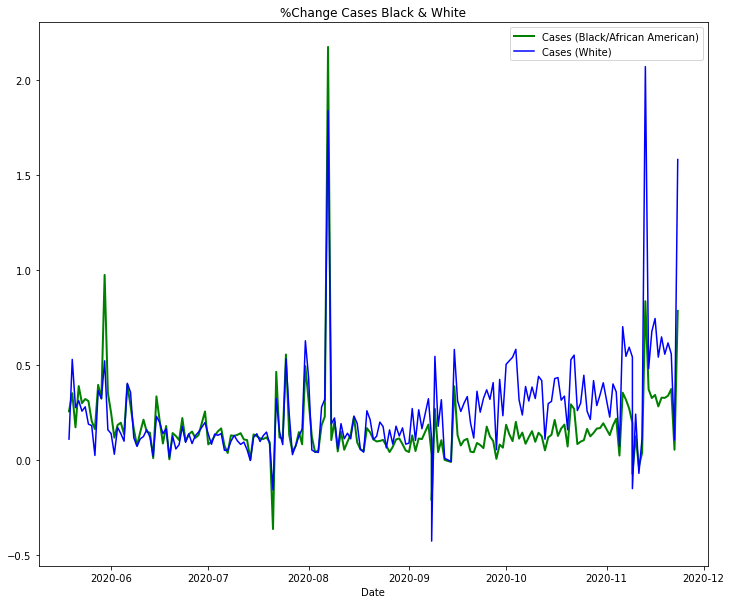

In [274]:
casesBAA = ofSelf[['Date','Cases Black']]
casesBAA.rename(columns={'Cases Black':'Cases (Black/African American)'},inplace=True)
casesBAA.set_index('Date',inplace=True)

casesWhite = ofSelf[['Date','Cases White']]
casesWhite.rename(columns={'Cases White':'Cases (White)'},inplace=True)
casesWhite.set_index('Date',inplace=True)

ax=casesBAA.plot(figsize=(12, 10), title='%Change Cases Black & White',linewidth=2, color='green')

casesWhite.plot(ax=ax, color='blue')

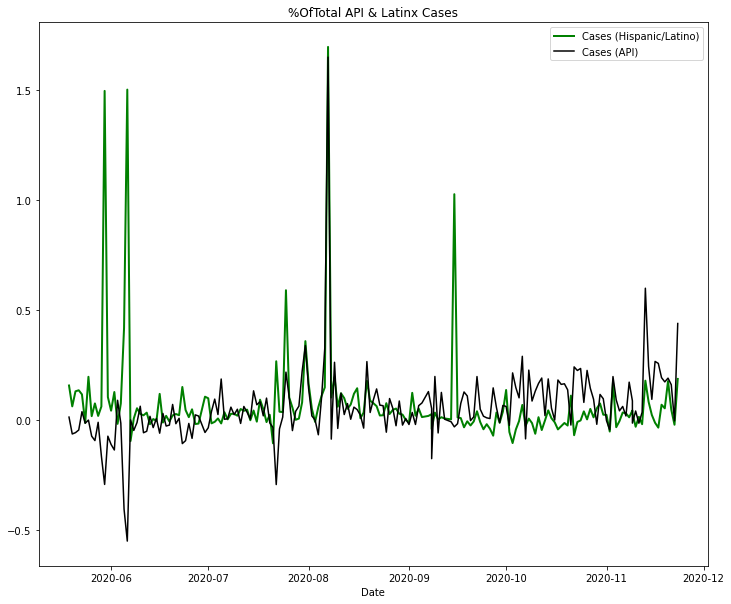

In [275]:
casesHL = ofTotal[['Date','Cases Latinx']]
casesHL.rename(columns={'Cases Latinx':'Cases (Hispanic/Latino)'},inplace=True)
casesHL.set_index('Date',inplace=True)

casesAPI = ofTotal[['Date','Cases API']]
casesAPI.rename(columns={'Cases API':'Cases (API)'},inplace=True)
casesAPI.set_index('Date',inplace=True)

ax=casesHL.plot(figsize=(12, 10), title='%OfTotal API & Latinx Cases',linewidth=2, color='green')

casesAPI.plot(ax=ax, color='black')